# Bixi Data Mining Project

Students: Quan Hao, 11248609; Gabriel Lainesse, 11189782; Chaoyang Zheng, 11249259 

Course: Data Mining Techniques

# Loading required libraries

In [1]:
#Machine learning librairies
import numpy as np
import pandas as pd
import sklearn
from sklearn import metrics

In [2]:
#Plotting librairies and settings
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
import patsy
import seaborn as sns
import graphviz
import joypy

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

In [3]:
# Other librairies
import os

# Importing the data

In [4]:
hdf_file = r"/Users/gabriel/dataset_2017_final.hdf"

In [5]:
dataset = pd.read_hdf(path_or_buf=hdf_file,key="dataset")

/Users/gabriel/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [6]:
# Checking dataset content and datatypes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4740357 entries, 0 to 4740356
Columns: 144 entries, start_date to statutory_holiday
dtypes: bool(84), datetime64[ns](4), float64(13), int16(3), int64(12), int8(6), object(22)
memory usage: 2.3+ GB


#### Adding Counter Variable

In [7]:
dataset['counter'] = 1

# Visualizing the Data

## Count of Bixi Stations Per Neighborhood

In [84]:
import geopandas as gpd

In [85]:
neighborhoods_coords = gpd.read_file("Data/Montreal/Arrondissements/limadmin.json")

In [86]:
neighborhoods_coords.head()

,NOM,TYPE,CODEID,ABREV,NUM,CODEMAMROT,AIRE,MUNID,PERIM,geometry
0,Outremont,Arrondissement,11,OM,5,REM05,3.813356e+06,66023,10836.670634,(POLYGON ((-73.62077559344181 45.5236508796029...
1,LaSalle,Arrondissement,22,LS,18,REM17,2.519727e+07,66023,25259.849467,"(POLYGON ((-73.6661041107315 45.4217973659872,..."
2,Mont-Royal,Ville liée,62,MR,2,66072,7.445560e+06,66023,18314.038523,"(POLYGON ((-73.6507508626002 45.526307356847, ..."
3,Ville-Marie,Arrondissement,9,VM,20,REM19,2.150063e+07,66023,26585.959852,"(POLYGON ((-73.5301291075517 45.5347580265772,..."
4,Le Plateau-Mont-Royal,Arrondissement,5,PM,22,REM21,8.151665e+06,66023,13158.328007,"(POLYGON ((-73.5592306898526 45.5398986242761,..."


In [87]:
stations = dataset[['start_neighborhood', 'start_code']]

In [88]:
stations.drop_duplicates(inplace=True)

/Users/gabriel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [89]:
stations = stations.groupby('start_neighborhood',as_index=False).count()

In [90]:
stations

,start_neighborhood,start_code
0,Ahuntsic-Cartierville,15
1,Côte-des-Neiges-Notre-Dame-de-Grâce,33
2,LaSalle,2
3,Le Plateau-Mont-Royal,129
4,Le Sud-Ouest,44
5,Mercier-Hochelaga-Maisonneuve,28
6,Outremont,11
7,Rosemont-La Petite-Patrie,86
8,Verdun,18
9,Ville-Marie,129


In [99]:
merged_stations_neigh = neighborhoods_coords.set_index('NOM').join(stations.set_index('start_neighborhood'))
merged_stations_neigh.head()

,TYPE,CODEID,ABREV,NUM,CODEMAMROT,AIRE,MUNID,PERIM,geometry,start_code
NOM,,,,,,,,,,
Outremont,Arrondissement,11,OM,5,REM05,3.813356e+06,66023,10836.670634,(POLYGON ((-73.62077559344181 45.5236508796029...,11.0
LaSalle,Arrondissement,22,LS,18,REM17,2.519727e+07,66023,25259.849467,"(POLYGON ((-73.6661041107315 45.4217973659872,...",2.0
Mont-Royal,Ville liée,62,MR,2,66072,7.445560e+06,66023,18314.038523,"(POLYGON ((-73.6507508626002 45.526307356847, ...",NaN
Ville-Marie,Arrondissement,9,VM,20,REM19,2.150063e+07,66023,26585.959852,"(POLYGON ((-73.5301291075517 45.5347580265772,...",129.0
Le Plateau-Mont-Royal,Arrondissement,5,PM,22,REM21,8.151665e+06,66023,13158.328007,"(POLYGON ((-73.5592306898526 45.5398986242761,...",129.0


/Users/gabriel/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


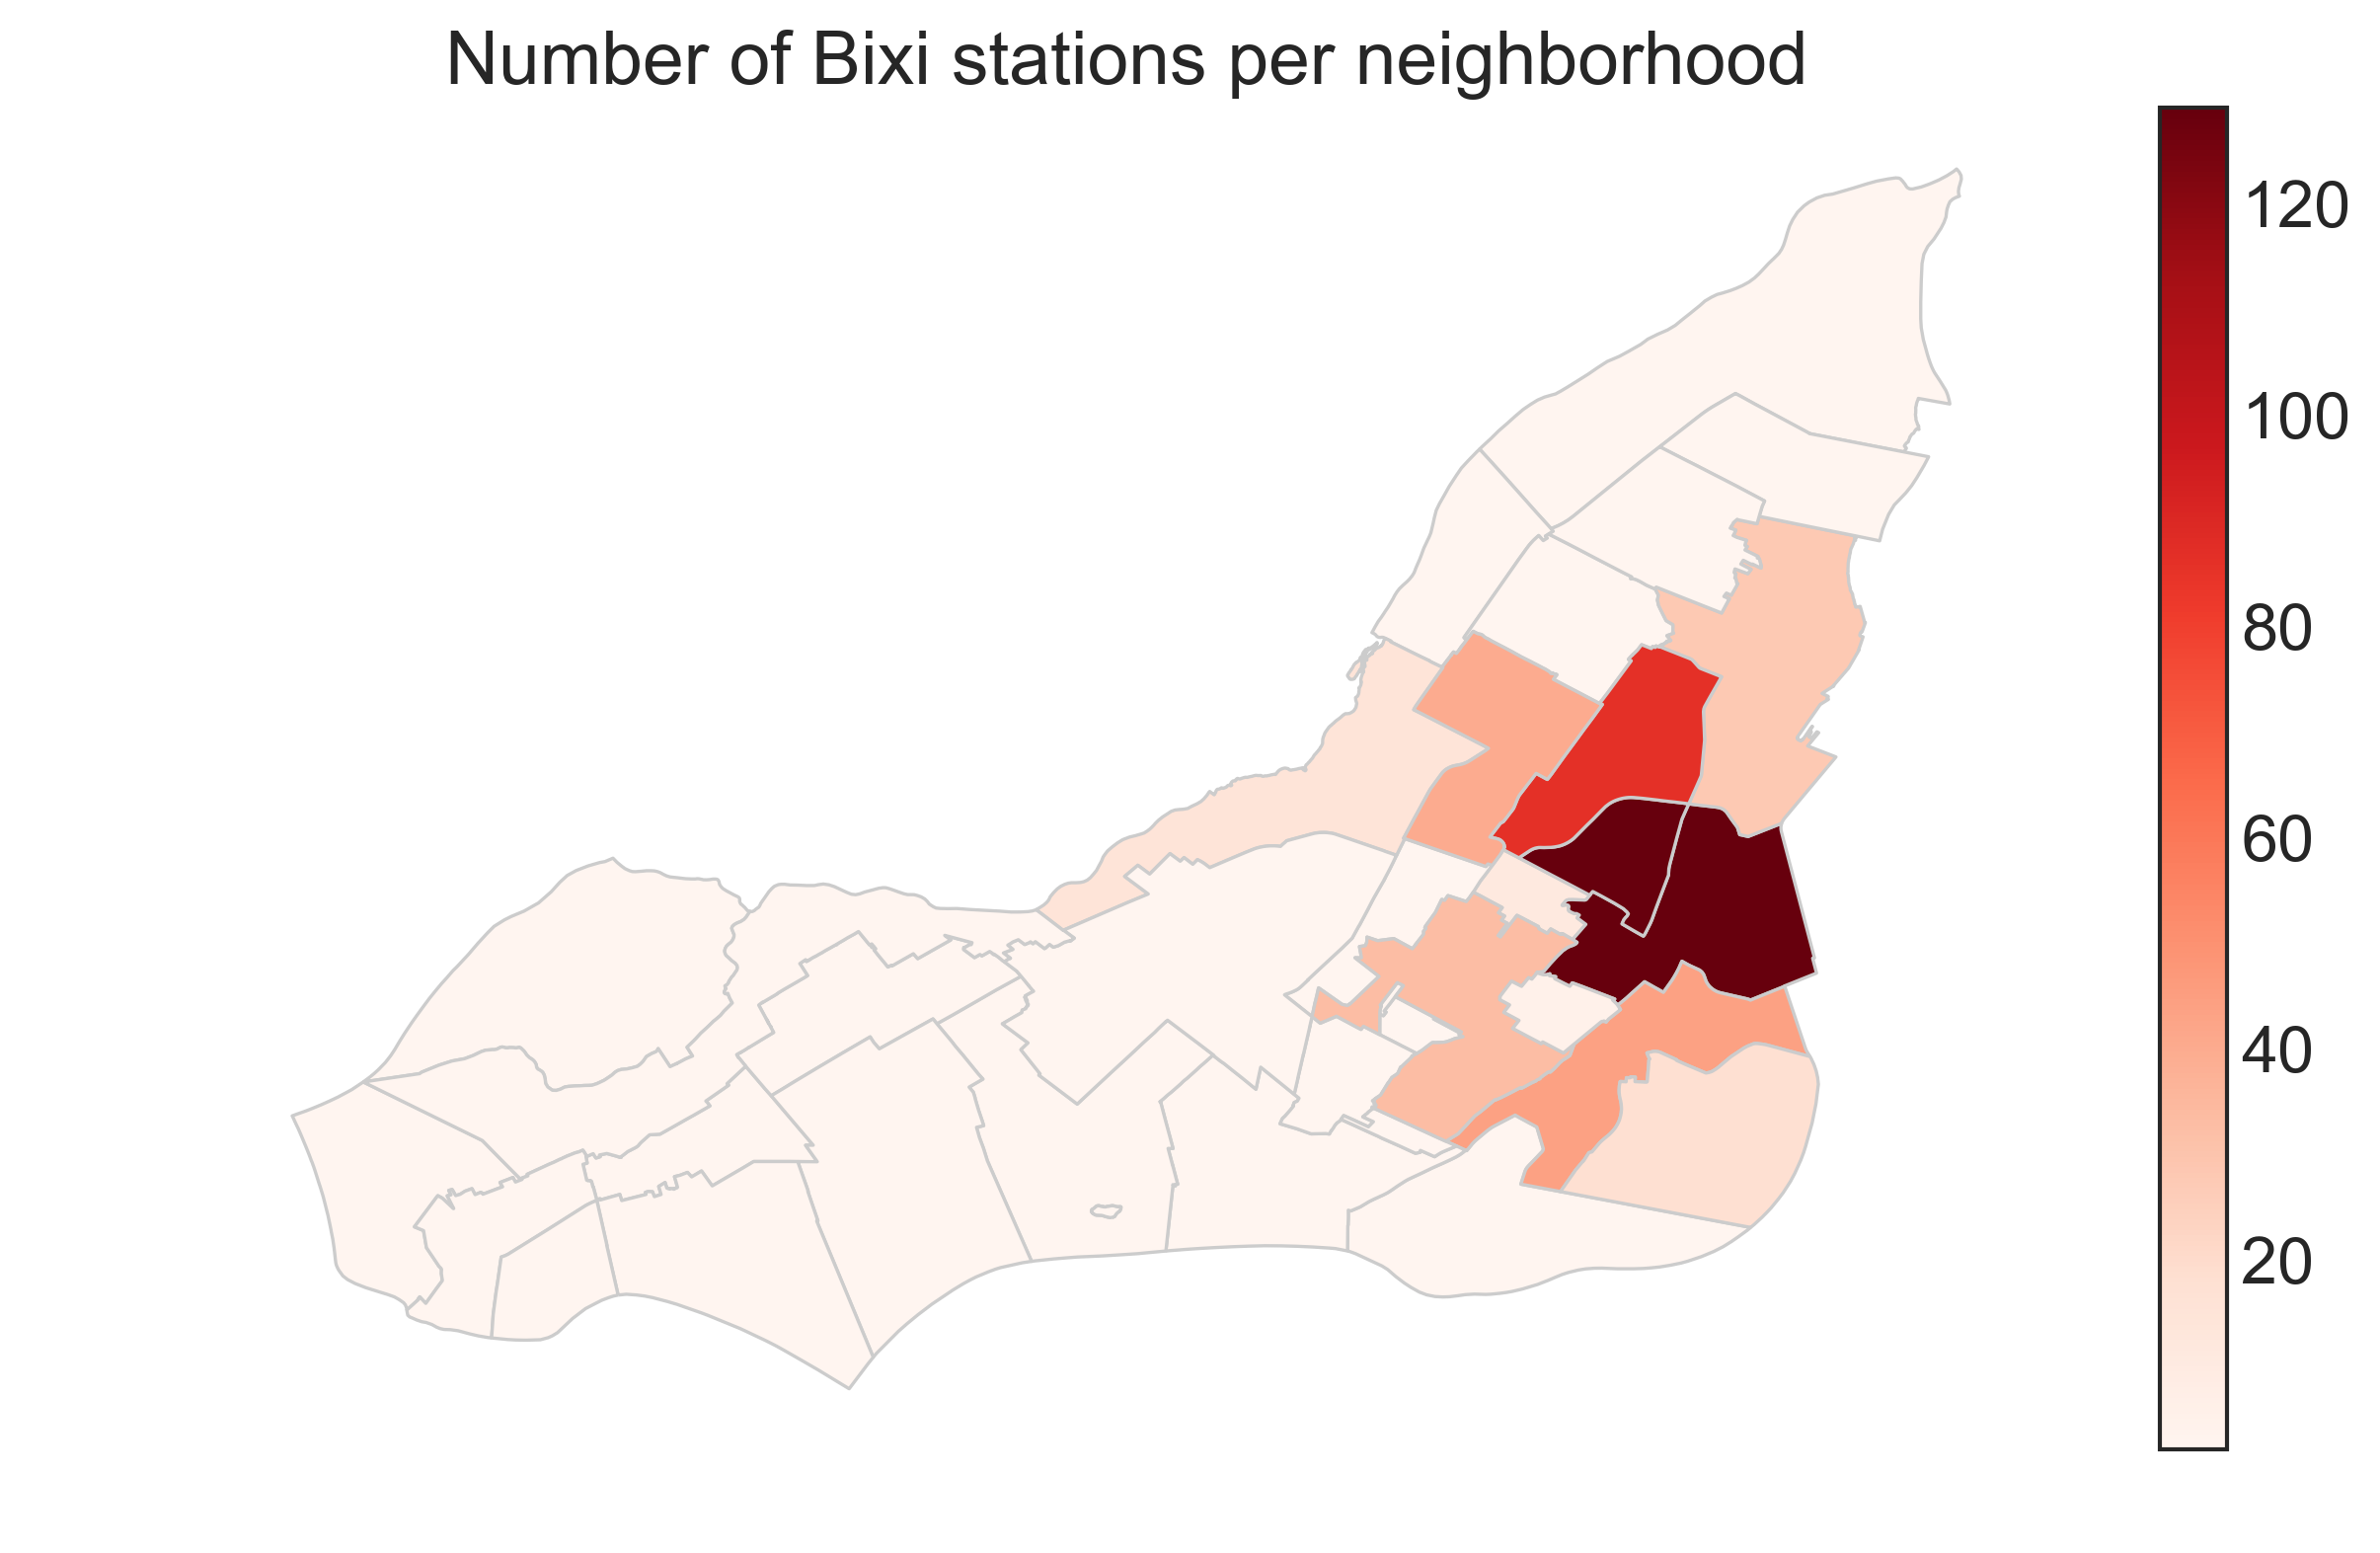

In [117]:
fig, ax = plt.subplots(1, figsize=(10, 6))
fig.set_dpi(300)
ax.axis('off')
vmin, vmax = merged_stations_neigh['start_code'].min(), merged_stations_neigh['start_code'].max()

# Title
ax.set_title('Number of Bixi stations per neighborhood', fontdict={'fontsize': '18', 'fontweight' : '3'})

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

merged_stations_neigh.plot(column='start_code', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')

## Count of Trips Per Starting Neighborhood

In [148]:
trip_count_per_neighborhood = pd.DataFrame(dataset['start_neighborhood'])

In [149]:
trip_count_per_neighborhood['counter'] = 1

In [150]:
trip_count_per_neighborhood = pd.DataFrame(trip_count_per_neighborhood.groupby('start_neighborhood')['counter'].sum())

In [154]:
trip_count_per_neighborhood.reset_index(inplace=True)

In [155]:
merged_trip_count_neigh = neighborhoods_coords.set_index('NOM').join(trip_count_per_neighborhood.set_index('start_neighborhood'))
merged_trip_count_neigh.head()

,TYPE,CODEID,ABREV,NUM,CODEMAMROT,AIRE,MUNID,PERIM,geometry,counter
NOM,,,,,,,,,,
Outremont,Arrondissement,11,OM,5,REM05,3.813356e+06,66023,10836.670634,(POLYGON ((-73.62077559344181 45.5236508796029...,66064.0
LaSalle,Arrondissement,22,LS,18,REM17,2.519727e+07,66023,25259.849467,"(POLYGON ((-73.6661041107315 45.4217973659872,...",4290.0
Mont-Royal,Ville liée,62,MR,2,66072,7.445560e+06,66023,18314.038523,"(POLYGON ((-73.6507508626002 45.526307356847, ...",NaN
Ville-Marie,Arrondissement,9,VM,20,REM19,2.150063e+07,66023,26585.959852,"(POLYGON ((-73.5301291075517 45.5347580265772,...",1454123.0
Le Plateau-Mont-Royal,Arrondissement,5,PM,22,REM21,8.151665e+06,66023,13158.328007,"(POLYGON ((-73.5592306898526 45.5398986242761,...",1812495.0


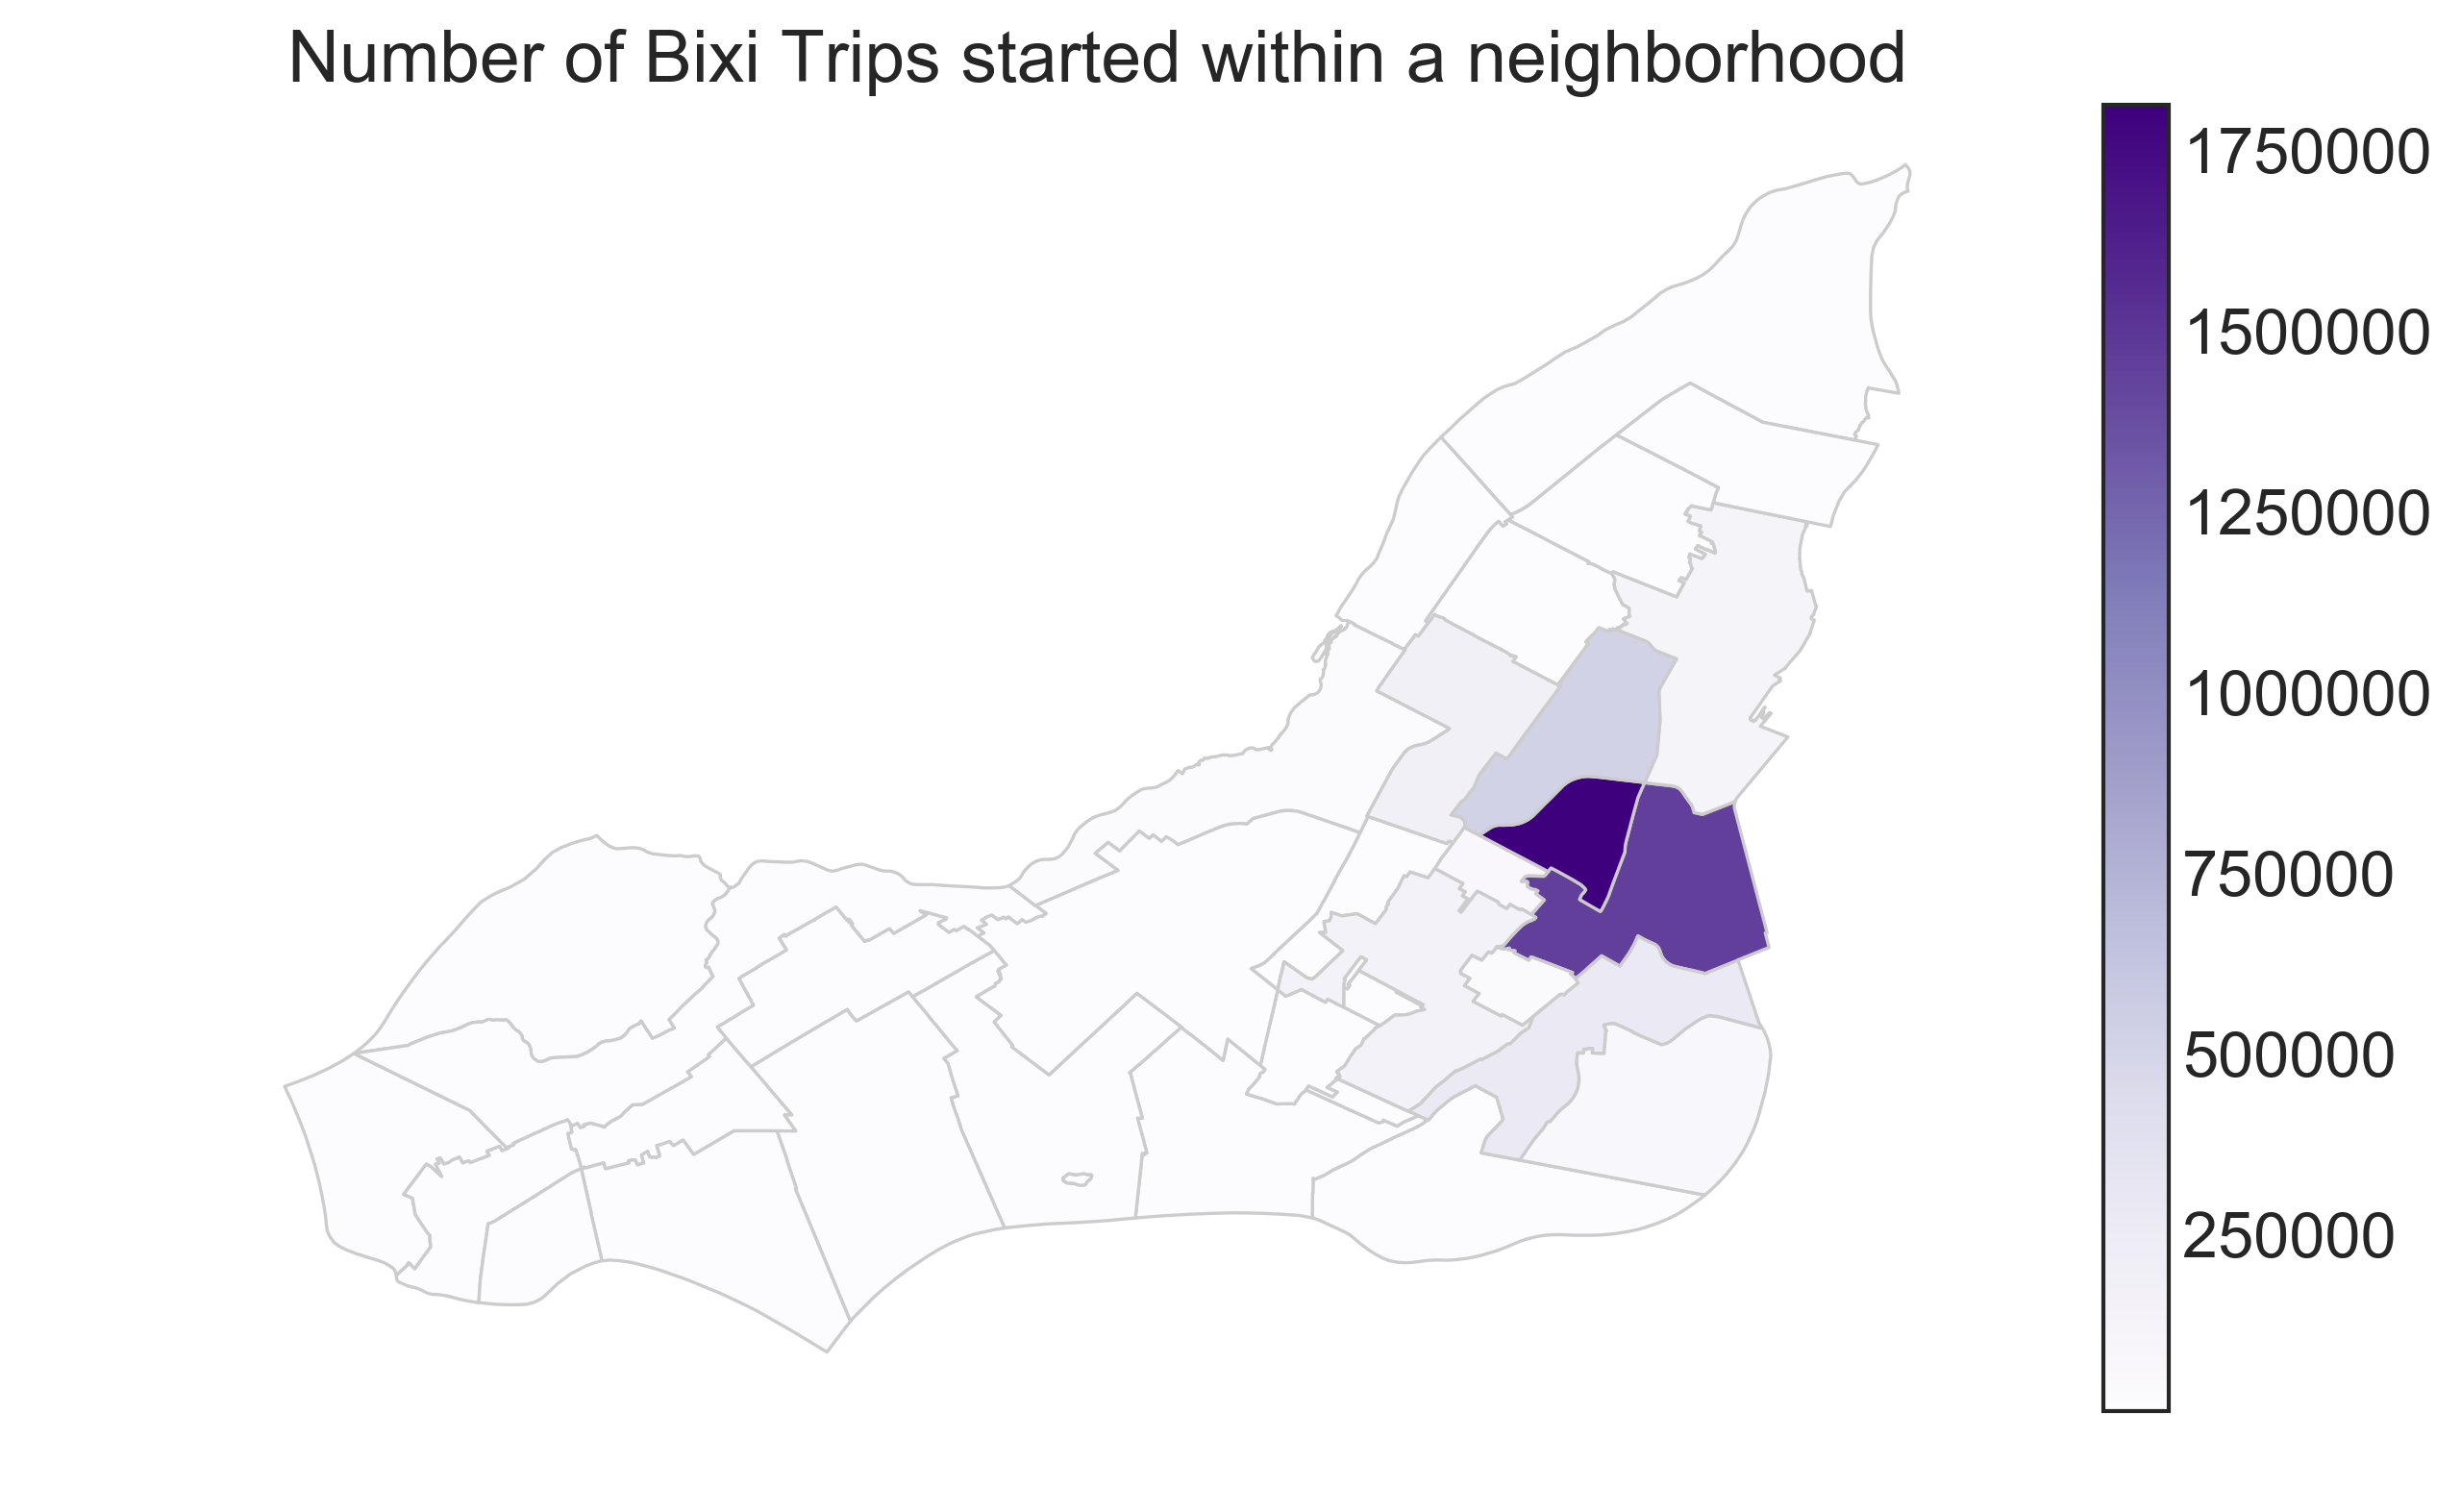

In [161]:
fig, ax = plt.subplots(1, figsize=(10, 6))
fig.set_dpi(300)
ax.axis('off')
vmin, vmax = merged_trip_count_neigh['counter'].min(), merged_trip_count_neigh['counter'].max()

# Title
ax.set_title('Number of Bixi Trips started within a neighborhood', fontdict={'fontsize': '18', 'fontweight' : '3'})

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Purples', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

merged_trip_count_neigh.plot(column='counter', cmap='Purples', linewidth=0.8, ax=ax, edgecolor='0.8')

### Count of trips per hour of the day

In [277]:
# Data setup
joyplot_data = pd.DataFrame(dataset.groupby(by=['start_date_hour','start_neighborhood'])['start_date'].count())
joyplot_data.reset_index(inplace=True)
joyplot_data.rename({'start_date':'trip count',
                     'start_neighborhood':'neighborhood',
                     'start_date_hour':'hour'
                    }, inplace=True, axis='columns')
joyplot_data.head()

,hour,neighborhood,trip count
0,0,Ahuntsic-Cartierville,356
1,0,Côte-des-Neiges-Notre-Dame-de-Grâce,2227
2,0,LaSalle,25
3,0,Le Plateau-Mont-Royal,35379
4,0,Le Sud-Ouest,3061


In [278]:
joyplot_data_pivot = joyplot_data.pivot(columns='neighborhood',index='hour',values='trip count')

In [279]:
joyplot_data_pivot.head()

neighborhood,Ahuntsic-Cartierville,Côte-des-Neiges-Notre-Dame-de-Grâce,LaSalle,Le Plateau-Mont-Royal,Le Sud-Ouest,Mercier-Hochelaga-Maisonneuve,Outremont,Rosemont-La Petite-Patrie,Verdun,Ville-Marie,Villeray-Saint-Michel-Parc-Extension,Westmount
hour,,,,,,,,,,,,
0,356.0,2227.0,25.0,35379.0,3061.0,2105.0,869.0,8969.0,877.0,24714.0,2883.0,312.0
1,216.0,1498.0,6.0,23086.0,1792.0,1175.0,493.0,5435.0,392.0,15772.0,1630.0,156.0
2,129.0,923.0,4.0,16115.0,1038.0,619.0,240.0,3307.0,175.0,10697.0,996.0,100.0
3,80.0,583.0,1.0,13376.0,909.0,490.0,133.0,2706.0,154.0,9652.0,769.0,82.0
4,41.0,346.0,NaN,5846.0,534.0,302.0,75.0,1467.0,87.0,4129.0,479.0,52.0


<Figure size 1280x800 with 0 Axes>

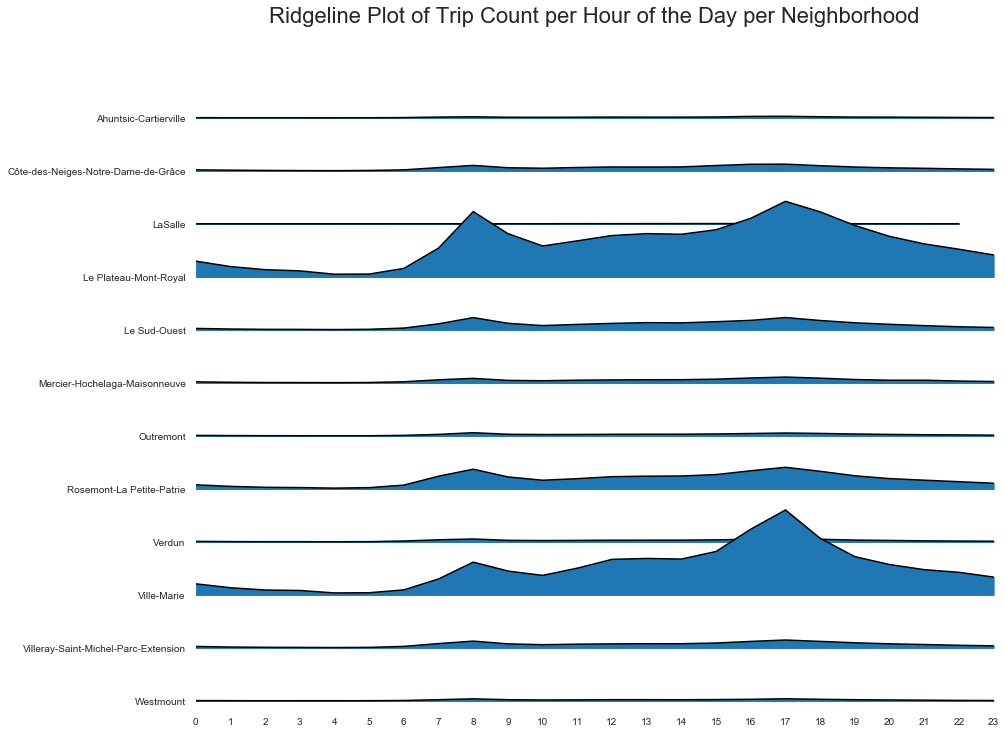

In [166]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
x_range = list(range(24))
fig, axes = joypy.joyplot(data=joyplot_data_pivot, kind='values', x_range=x_range, 
                         figsize=(14,10),
                         overlap=1
                         )
axes[-1].set_xticks(x_range);
# Decoration
plt.title('Ridgeline Plot of Trip Count per Hour of the Day per Neighborhood', fontsize=22)
plt.show()

### Catplot

/Users/gabriel/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


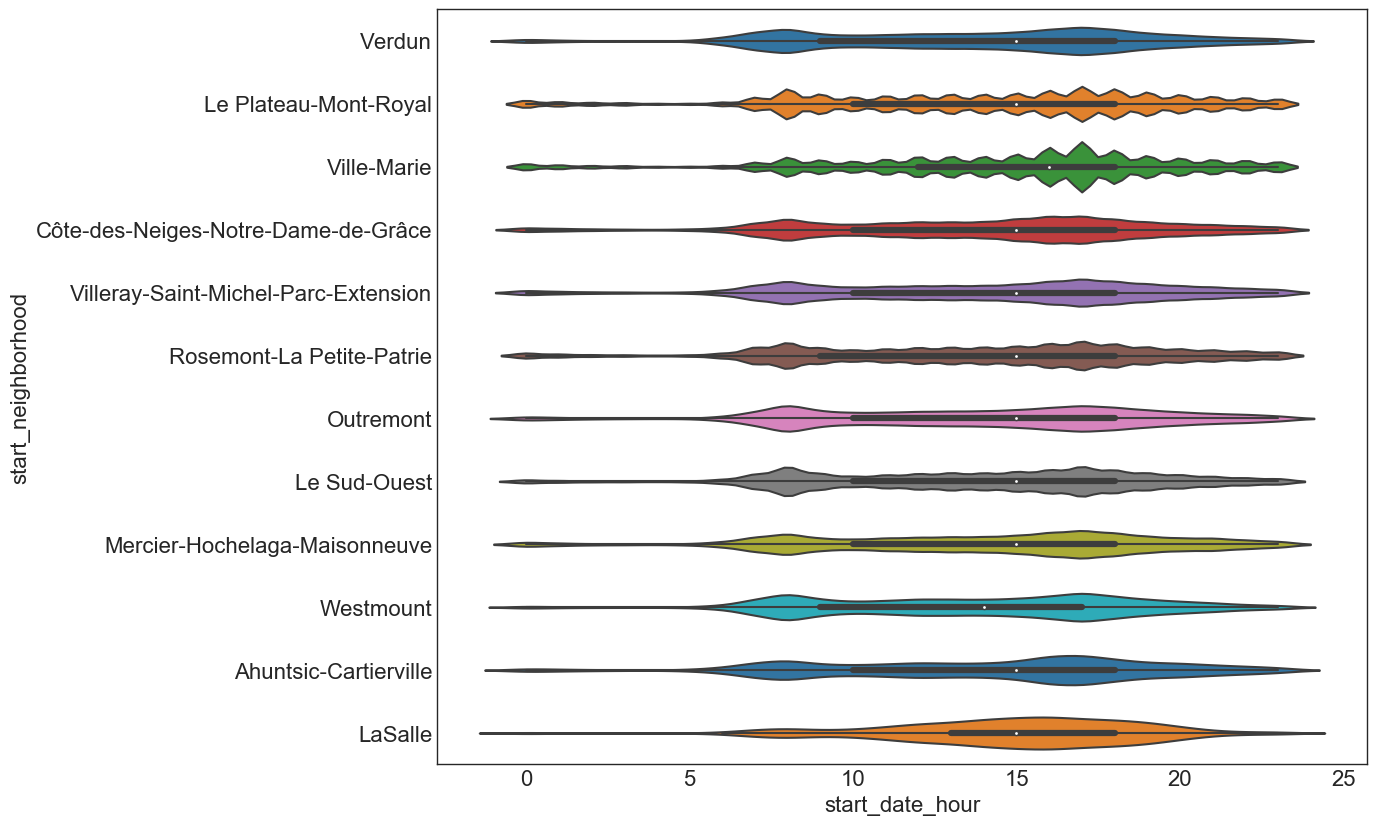

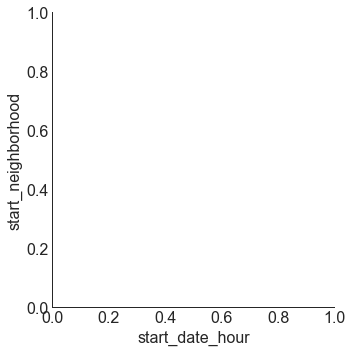

In [209]:
fig = plt.figure(figsize=(12,10), dpi=100)
ax1 = fig.add_subplot(111)
sns.catplot(ax=ax1,
            x="start_date_hour", 
            y="start_neighborhood", 
            data=dataset,
            estimator=np.count_nonzero,
            unit='counter',
            orient="h", 
            height=5, 
            palette="tab10",
            kind="violin")

## Weather Data Visualizations

In [443]:
aggregates = {'Temperature': {'avg_Temperature': 'mean'},
              'Humidity': {'avg_Humidity': 'mean'},
              'Pressure': {'avg_Pressure': 'mean'},
              'Wind Speed': {'avg_Wind Speed': 'mean'},
              'counter': {'Total Trip Count': 'sum'}   
}

In [360]:
weather_data = pd.DataFrame(dataset.groupby(['start_weeknum']).agg(aggregates))
weather_data.reset_index(inplace=True)
weather_data.sort_values(by='start_weeknum')
weather_data.head()

/Users/gabriel/anaconda3/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,start_weeknum,Temperature,Humidity,Pressure,Wind Speed,counter
,,avg_Temperature,avg_Humidity,avg_Pressure,avg_Wind Speed,Total Trip Count
0,15,11.236534,58.291718,1017.876137,2.353584,15275
1,16,7.547910,68.373947,1019.431916,4.705964,74195
2,17,12.241796,63.884678,1015.284324,5.768354,106857
3,18,10.262993,72.870332,1006.998137,5.342195,88549
4,19,9.271460,67.234626,1014.979697,3.772804,115746


In [431]:
weather_data_by_date = pd.DataFrame(dataset.groupby(['start_date']).agg(aggregates))
weather_data_by_date['start_date'] = weather_data_by_date.index
weather_data_by_date.head()

,Temperature,Humidity,Pressure,Wind Speed,counter,start_date
,avg_Temperature,avg_Humidity,avg_Pressure,avg_Wind Speed,Total Trip Count,
start_date,,,,,,
2017-04-15,10.721020,46.388319,1021.986217,1.896625,11318,2017-04-15
2017-04-16,12.711029,92.338388,1006.120293,3.660601,3957,2017-04-16
2017-04-17,7.526108,73.705699,1013.464535,5.719886,8036,2017-04-17
2017-04-18,5.110923,51.842470,1030.437373,2.261519,13261,2017-04-18
2017-04-19,5.599499,65.571537,1024.909558,6.790381,6612,2017-04-19


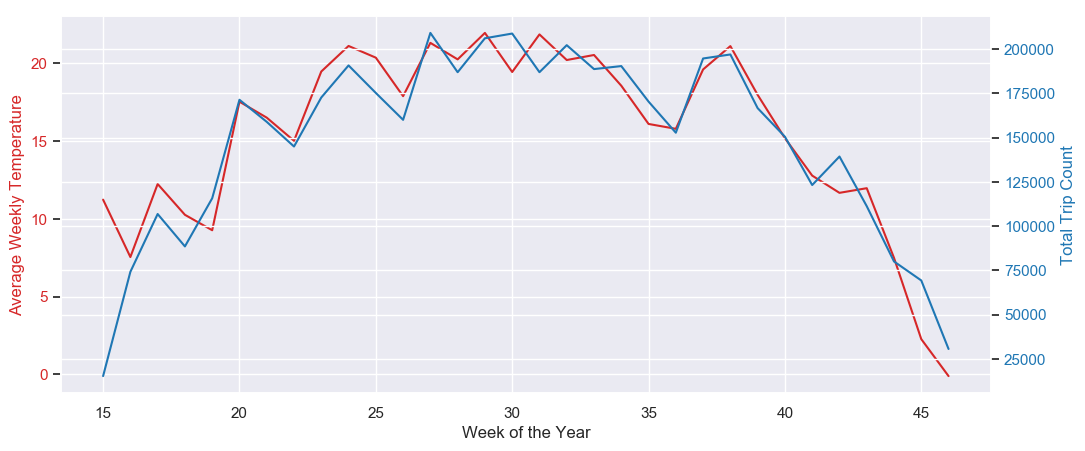

In [384]:
#First plot
fig = plt.figure(num=1, figsize=(12,5), dpi=100)
ax1 = fig.add_subplot(111)
t = np.asarray(weather_data['start_weeknum'])

color = 'tab:red'
ax1.set_xlabel('Week of the Year')
ax1.set_ylabel('Average Weekly Temperature', color=color)
ax1.plot(t, weather_data['Temperature'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Total Trip Count', color=color)  # we already handled the x-label with ax1
ax2.plot(t, weather_data['counter'], color=color)
ax2.tick_params(axis='y', labelcolor=color)


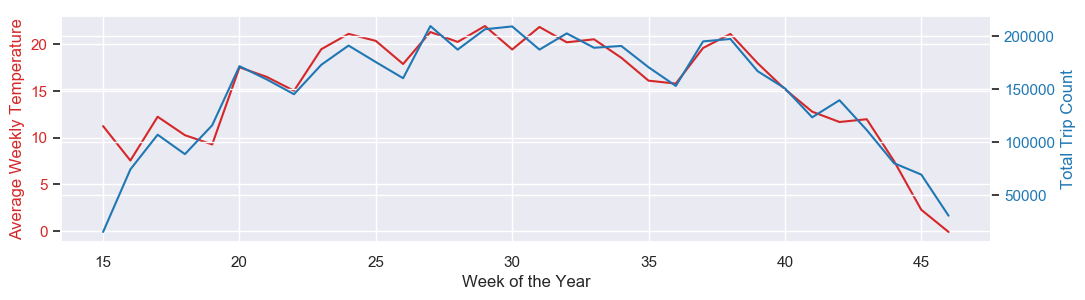

In [415]:
#First plot
fig = plt.figure(num=1, figsize=(12,3), dpi=100)
ax1 = fig.add_subplot(111)
t = np.asarray(weather_data['start_weeknum'])

color = 'tab:red'
ax1.set_xlabel('Week of the Year')
ax1.set_ylabel('Average Weekly Temperature', color=color)
ax1.plot(t, weather_data['Temperature'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Total Trip Count', color=color)  # we already handled the x-label with ax1
ax2.plot(t, weather_data['counter'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.show()

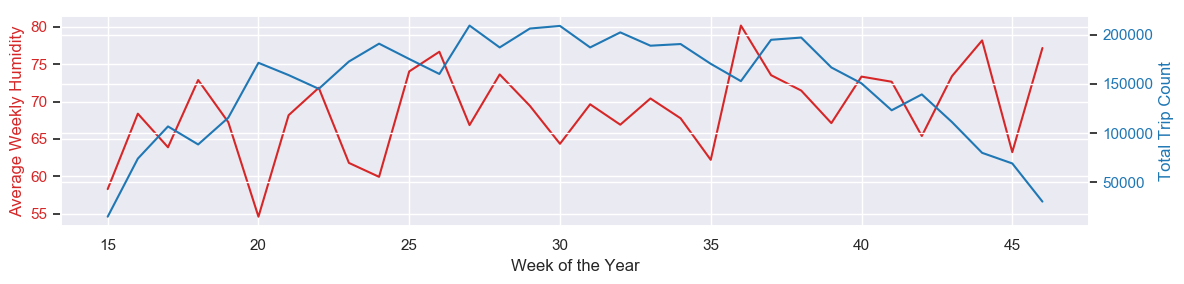

In [404]:
# Second plot
fig2 = plt.figure(num=2, figsize=(12,3), dpi=100)
ax3 = fig2.add_subplot(111)
t = np.asarray(weather_data['start_weeknum'])

color = 'tab:red'
ax3.set_xlabel('Week of the Year')
ax3.set_ylabel('Average Weekly Humidity', color=color)
ax3.plot(t, weather_data['Humidity'], color=color)
ax3.tick_params(axis='y', labelcolor=color)

ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax4.set_ylabel('Total Trip Count', color=color)  # we already handled the x-label with ax1
ax4.plot(t, weather_data['counter'], color=color)
ax4.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig2.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



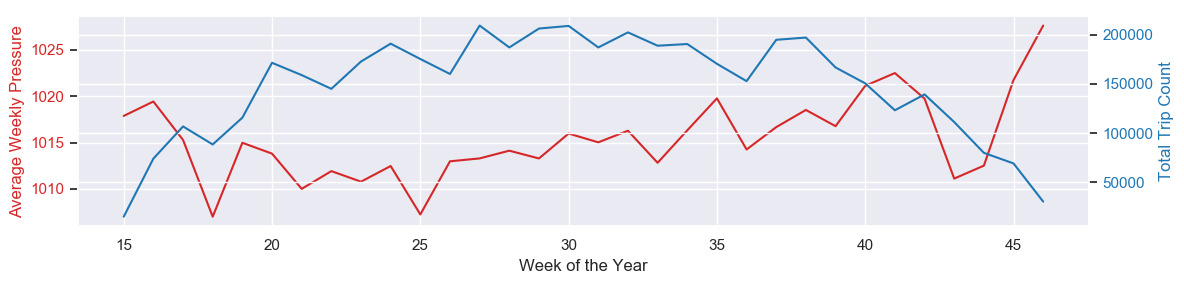

In [413]:
# Third plot
fig = plt.figure(num=2, figsize=(12,3), dpi=100)
ax3 = fig.add_subplot(111)
t = np.asarray(weather_data['start_weeknum'])

color = 'tab:red'
ax3.set_xlabel('Week of the Year')
ax3.set_ylabel('Average Weekly Pressure', color=color)
ax3.plot(t, weather_data['Pressure'], color=color)
ax3.tick_params(axis='y', labelcolor=color)

ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax4.set_ylabel('Total Trip Count', color=color)  # we already handled the x-label with ax1
ax4.plot(t, weather_data['counter'], color=color)
ax4.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


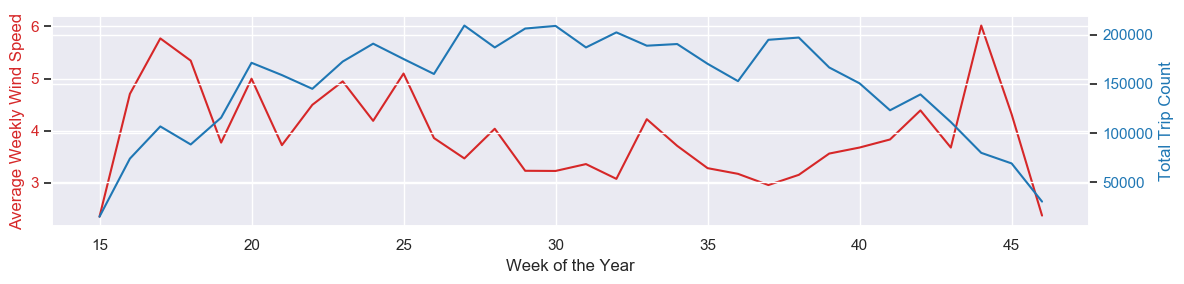

In [416]:
# Fourth plot
fig = plt.figure(num=2, figsize=(12,3), dpi=100)
ax3 = fig.add_subplot(111)
t = np.asarray(weather_data['start_weeknum'])

color = 'tab:red'
ax3.set_xlabel('Week of the Year')
ax3.set_ylabel('Average Weekly Wind Speed', color=color)
ax3.plot(t, weather_data['Wind Speed'], color=color)
ax3.tick_params(axis='y', labelcolor=color)

ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax4.set_ylabel('Total Trip Count', color=color)  # we already handled the x-label with ax1
ax4.plot(t, weather_data['counter'], color=color)
ax4.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


# By Hour

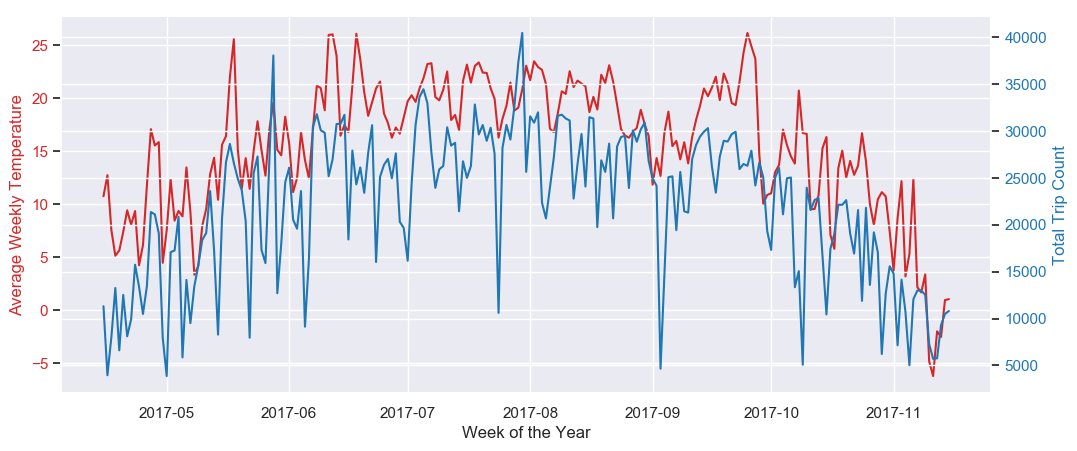

In [433]:
#First plot
fig = plt.figure(num=1, figsize=(12,5), dpi=100)
ax1 = fig.add_subplot(111)
t = np.asarray(weather_data_by_date['start_date'])

color = 'tab:red'
ax1.set_xlabel('Day of the Year')
ax1.set_ylabel('Average Daily Temperature', color=color)
ax1.plot(t, weather_data_by_date['Temperature'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Total Trip Count', color=color)  # we already handled the x-label with ax1
ax2.plot(t, weather_data_by_date['counter'], color=color)
ax2.tick_params(axis='y', labelcolor=color)


## Boxplot

In [585]:
weather_data_boxplot = dataset.groupby(['start_date','Weather Condition']).agg(aggregates)
weather_data_boxplot_sort = weather_data_boxplot
weather_data_boxplot_sort.columns= ["avg_Temperature", "avg_Humidity", "avg_Pressure", "avg_Wind Speed", "Total Trip Count"]
weather_data_boxplot.reset_index(drop=False, inplace=True)
weather_data_boxplot.head()

,start_date,Weather Condition,avg_Temperature,avg_Humidity,avg_Pressure,avg_Wind Speed,Total Trip Count
0,2017-04-15,broken clouds,13.291462,41.791394,1020.377557,1.399283,4741
1,2017-04-15,few clouds,7.759658,48.660491,1024.745066,2.081353,2483
2,2017-04-15,light intensity shower rain,14.019130,67.123913,1013.789130,8.102174,460
3,2017-04-15,overcast clouds,4.350000,60.000000,1025.000000,2.000000,990
4,2017-04-15,scattered clouds,13.545936,37.004147,1021.400829,1.080166,1447


In [590]:
custom_ordering = weather_data_boxplot_sort.groupby(["Weather Condition"])["Total Trip Count"].mean().iloc[::-1]
custom_ordering.sort_values(ascending=False, inplace=True)
#custom_ordering = custom_ordering.reset_index(inplace=True)

In [591]:
custom_ordering

Weather Condition
broken clouds                   7094.112821
few clouds                      6279.763975
overcast clouds                 4102.101266
sky is clear                    3956.440476
mist                            3834.662921
scattered clouds                2960.380368
fog                             2477.000000
light intensity drizzle rain    2286.000000
haze                            2075.375000
light intensity shower rain     1952.059524
light rain                      1703.720000
thunderstorm with rain          1696.333333
proximity shower rain           1655.693878
light shower snow               1190.000000
proximity thunderstorm          1142.100000
thunderstorm with light rain    1138.476190
thunderstorm                     980.333333
moderate rain                    964.750000
light intensity drizzle          708.636364
thunderstorm with heavy rain     679.333333
shower rain                      362.000000
Name: Total Trip Count, dtype: float64

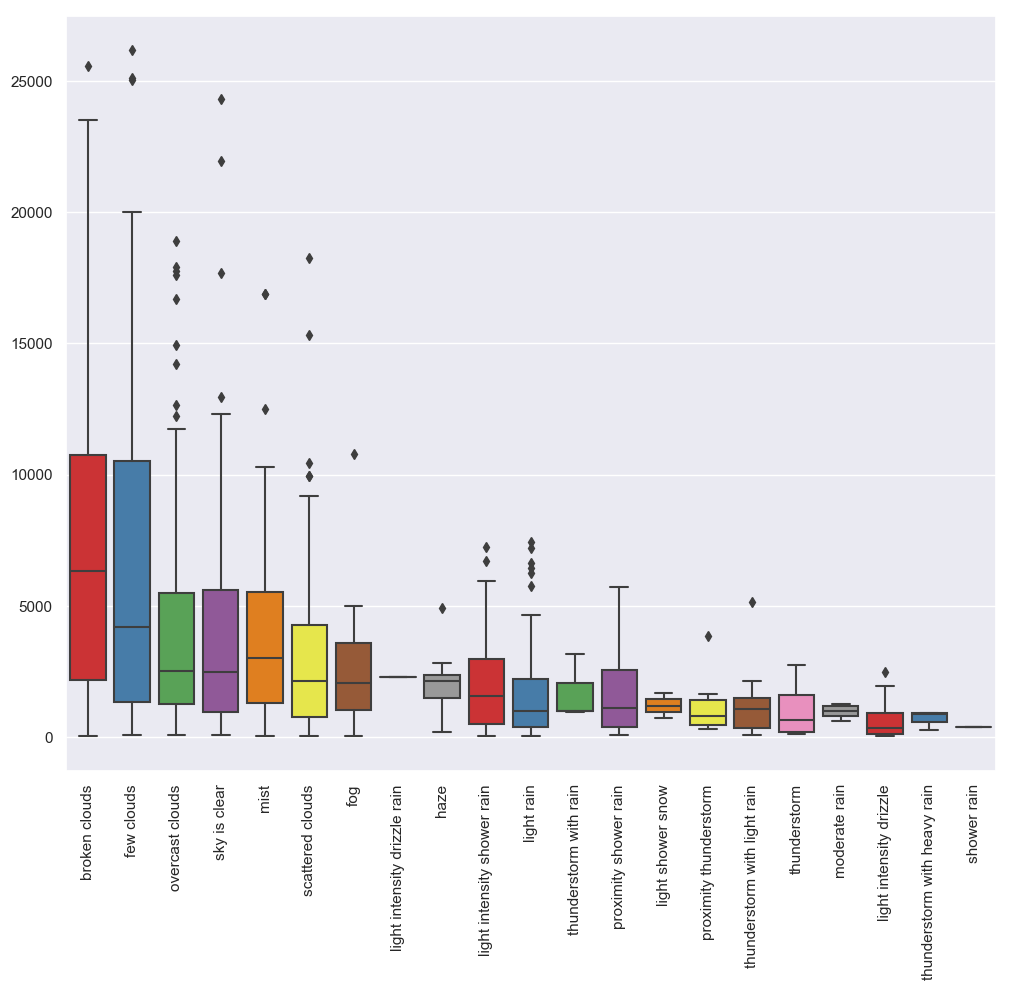

In [597]:
import seaborn as sns
fig = plt.figure(num=1, figsize=(12,10), dpi=100)
# Grouped boxplot
x_values = np.asarray(weather_data_boxplot["Weather Condition"])
x_values = x_values.reshape(-1,)
y_values = np.asarray(weather_data_boxplot["Total Trip Count"])
y_values = y_values.reshape(-1,)
sns.boxplot(x=x_values, y=y_values,
            palette="Set1", order=custom_ordering.index)
plt.xticks(rotation=90)
plt.show()

-----------------------

_______________

# Changing Reference Frame : Creating datasets for modeling

#### Datasets to build:
- Count of trips, per starting neighborhood
- Count of trips, per route affectation
- Duration, by DateTime...?

### Setting Aggregations used during Grouping

In [8]:
aggregations = {
    'duration_sec':{'sum_duration_sec':'sum',
                    'avg_duration_sec':'mean'},
    
    'start_date':{'count_of_trips':'count'},
    
    'is_member':{'proportion_members':'mean',
                 'count_members':'sum'},

    'Humidity':{'avg_Humidity':'mean'},
    'Pressure':{'avg_Pressure':'mean'},
    'Wind Speed':{'avg_Wind_Speed':'mean'},
    'Temperature':{'avg_Temperature':'mean'},
    'Fuel Price':{'avg_Fuel Price':'mean'}
}

## Dataset By Starting Neighborhood, Weather Conditions, DateTime

In [9]:
list(dataset.columns)

['start_date',
 'end_date',
 'duration_sec',
 'is_member',
 'start_code',
 'start_name',
 'start_latitude',
 'start_longitude',
 'start_neighborhood',
 'start_great_park',
 'start_affectation',
 'end_code',
 'end_name',
 'end_latitude',
 'end_longitude',
 'end_neighborhood',
 'end_great_park',
 'end_affectation',
 'start_date_hour',
 'end_date_hour',
 'Weather Condition',
 'Humidity',
 'Pressure',
 'Wind Speed',
 'Temperature',
 'festivial_name_1',
 'festival1_lat',
 'festival1_long',
 'festival_name_2',
 'festival2_lat',
 'festival2_long',
 'statutory_holiday_name',
 'has_festival',
 'start_datetime',
 'end_datetime',
 'start_month',
 'end_month',
 'start_daynum',
 'end_daynum',
 'start_weeknum',
 'end_weeknum',
 'start_weekday',
 'end_weekday',
 'route',
 'route_name',
 'period_of_day_large',
 'period_of_day_small',
 'Fuel Price',
 'route_affectations',
 'route_neighborhood',
 'route_great_park',
 'Weather_Rain',
 'Weather_Thunderstorm',
 'Weather_Fog',
 'Weather_Mist',
 'Weather_Sno

In [10]:
dataset_by_neighborhood = dataset.groupby(['start_date_hour', 'start_weeknum', 'start_month', 'start_weekday', 'has_festival',
                                          'statutory_holiday','Weather_Rain', 'Weather_Thunderstorm', 'Weather_Fog', 'Weather_Mist',
                                          'Weather_Snow', 'Weather_Drizzle', 'Weather_Haze', 'Weather_Clear',
                                          'Weather_BrokenClouds', 'Weather_FewClouds', 'Weather_OvercastClouds', 'Weather_ScatteredClouds', 
                                          'sn_Verdun', 'sn_Le Plateau-Mont-Royal', 'sn_Ville-Marie',
                                          'sn_Côte-des-Neiges-Notre-Dame-de-Grâce', 'sn_Villeray-Saint-Michel-Parc-Extension',
                                          'sn_Rosemont-La Petite-Patrie', 'sn_Outremont', 'sn_Le Sud-Ouest', 'sn_Mercier-Hochelaga-Maisonneuve',
                                          'sn_Westmount', 'sn_Ahuntsic-Cartierville', 'sn_LaSalle',
                                          'swd_Monday', 'swd_Tuesday', 'swd_Wednesday', 'swd_Thursday', 'swd_Friday', 'swd_Saturday', 'swd_Sunday',
                                          'sm_April', 'sm_May', 'sm_June', 'sm_July', 'sm_August','sm_September', 'sm_October']).agg(aggregations)
dataset_by_neighborhood.sort_index(inplace=True)
dataset_by_neighborhood.columns = dataset_by_neighborhood.columns.droplevel()
dataset_by_neighborhood.reset_index(inplace=True)
dataset_by_neighborhood.head()

/Users/gabriel/anaconda3/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,start_date_hour,start_weeknum,start_month,start_weekday,has_festival,statutory_holiday,Weather_Rain,Weather_Thunderstorm,Weather_Fog,Weather_Mist,...,sum_duration_sec,avg_duration_sec,count_of_trips,proportion_members,count_members,avg_Humidity,avg_Pressure,avg_Wind_Speed,avg_Temperature,avg_Fuel Price
0,0,15,4,5,False,False,False,False,False,False,...,220,220.000000,1,1.0,1,22.000000,1027.0,4.000000,13.000000,114.55
1,0,15,4,5,False,False,False,False,False,False,...,3563,445.375000,8,1.0,8,26.500000,1027.0,3.625000,12.126250,114.55
2,0,15,4,5,False,False,False,False,False,False,...,904,904.000000,1,1.0,1,22.000000,1027.0,4.000000,13.000000,114.55
3,0,15,4,5,False,False,False,False,False,False,...,9162,704.769231,13,1.0,13,31.230769,1027.0,3.230769,11.207692,114.55
4,0,15,4,5,False,False,False,False,False,False,...,5175,739.285714,7,1.0,7,27.142857,1027.0,3.571429,12.001429,114.55


In [11]:
dataset_by_neighborhood.shape

(75986, 54)

In [12]:
dataset_by_neighborhood['count_of_trips'].mean()

62.38461032295423

## Dataset By Route Affectations v1

In [13]:
dataset_by_affectation = dataset.groupby(['start_date_hour', 'start_weeknum', 'start_month', 'start_weekday', 'has_festival', 
                                          'statutory_holiday','Weather_Rain', 'Weather_Thunderstorm', 'Weather_Fog', 'Weather_Mist',
                                          'Weather_Snow', 'Weather_Drizzle', 'Weather_Haze', 'Weather_Clear',
                                          'Weather_BrokenClouds', 'Weather_FewClouds', 'Weather_OvercastClouds',
                                          'Weather_ScatteredClouds', 
                                           'ra_mixte-residentiel',
                                             'ra_residentiel-residentiel',
                                             'ra_mixte-mixte',
                                             'ra_institution-mixte',
                                             'ra_institution-residentiel',
                                             'ra_parc-residentiel',
                                             'ra_mixte-parc',
                                             'ra_emplois-residentiel',
                                             'ra_parc-parc',
                                             'ra_mixte-nan',
                                             'ra_institution-parc',
                                             'ra_emplois-mixte',
                                             'ra_activitesdiversifiees-residentiel',
                                             'ra_institution-institution',
                                             'ra_nan-residentiel',
                                             'ra_activitesdiversifiees-mixte',
                                             'ra_mixte-religieux',
                                             'ra_nan-nan',
                                             'ra_institution-nan',
                                             'ra_emplois-institution',
                                             'ra_emplois-parc',
                                             'ra_emplois-emplois',
                                             'ra_religieux-residentiel',
                                             'ra_activites diversifiees-parc',
                                             'ra_nan-parc',
                                             'ra_institution-religieux',
                                             'ra_activitesdiversifiees-institution',
                                             'ra_activitesdiversifiees-emplois',
                                             'ra_nan-religieux',
                                             'ra_activitesdiversifiees-activitesdiversifiees',
                                             'ra_emplois-nan',
                                             'ra_parc-religieux',
                                             'ra_activitesdiversifiees-nan',
                                             'ra_religieux-religieux',
                                             'ra_activitesdiversifiees-religieux',
                                             'ra_emplois-religieux',
                                          'swd_Monday', 'swd_Tuesday',
                                          'swd_Wednesday', 'swd_Thursday', 'swd_Friday', 'swd_Saturday',
                                          'swd_Sunday', 'sm_April', 'sm_May', 'sm_June', 'sm_July', 'sm_August',
                                          'sm_September', 'sm_October'
                                          ]).agg(aggregations)
dataset_by_affectation.sort_index(inplace=True)
dataset_by_affectation.columns = dataset_by_affectation.columns.droplevel()
dataset_by_affectation.reset_index(inplace=True)
dataset_by_affectation.head()

,start_date_hour,start_weeknum,start_month,start_weekday,has_festival,statutory_holiday,Weather_Rain,Weather_Thunderstorm,Weather_Fog,Weather_Mist,...,sum_duration_sec,avg_duration_sec,count_of_trips,proportion_members,count_members,avg_Humidity,avg_Pressure,avg_Wind_Speed,avg_Temperature,avg_Fuel Price
0,0,15,4,5,False,False,False,False,False,False,...,18241,701.576923,26,0.846154,22,25.692308,1027.0,3.692308,12.283077,114.55
1,0,15,4,5,False,False,False,False,False,False,...,1757,1757.000000,1,1.000000,1,34.000000,1027.0,3.000000,10.670000,114.55
2,0,15,4,5,False,False,False,False,False,False,...,321,321.000000,1,1.000000,1,34.000000,1027.0,3.000000,10.670000,114.55
3,0,15,4,5,False,False,False,False,False,False,...,978,978.000000,1,1.000000,1,34.000000,1027.0,3.000000,10.670000,114.55
4,0,15,4,5,False,False,False,False,False,False,...,1685,561.666667,3,1.000000,3,26.000000,1027.0,3.666667,12.223333,114.55


In [14]:
dataset_by_affectation.shape

(135384, 78)

In [15]:
dataset_by_affectation['count_of_trips'].mean()

35.01415972345329

## Dataset By Route Affectations v2

In [16]:
dataset_by_affectationv2 = dataset.groupby(['start_date_hour', 'start_weeknum', 'start_month', 'start_weekday', 'has_festival', 
                                          'statutory_holiday','Weather_Rain', 'Weather_Thunderstorm', 'Weather_Fog', 'Weather_Mist',
                                          'Weather_Snow', 'Weather_Drizzle', 'Weather_Haze', 'Weather_Clear',
                                          'Weather_BrokenClouds', 'Weather_FewClouds', 'Weather_OvercastClouds',
                                          'Weather_ScatteredClouds', 
                                         'ra2_mixte',
                                         'ra2_emplois',
                                         'ra2_religieux',
                                         'ra2_activitediversifiees',
                                         'ra2_nan',
                                         'ra2_institution',
                                         'ra2_parc',
                                         'ra2_residentiel',
                                          'swd_Monday', 'swd_Tuesday',
                                          'swd_Wednesday', 'swd_Thursday', 'swd_Friday', 'swd_Saturday',
                                          'swd_Sunday', 'sm_April', 'sm_May', 'sm_June', 'sm_July', 'sm_August',
                                          'sm_September', 'sm_October'
                                          ]).agg(aggregations)
dataset_by_affectationv2.sort_index(inplace=True)
dataset_by_affectationv2.columns = dataset_by_affectationv2.columns.droplevel()
dataset_by_affectationv2.reset_index(inplace=True)
dataset_by_affectationv2.head()

,start_date_hour,start_weeknum,start_month,start_weekday,has_festival,statutory_holiday,Weather_Rain,Weather_Thunderstorm,Weather_Fog,Weather_Mist,...,sum_duration_sec,avg_duration_sec,count_of_trips,proportion_members,count_members,avg_Humidity,avg_Pressure,avg_Wind_Speed,avg_Temperature,avg_Fuel Price
0,0,15,4,5,False,False,False,False,False,False,...,35445,770.543478,46,0.956522,44,26.434783,1027.0,3.630435,12.138913,114.55
1,0,15,4,5,False,False,False,False,False,False,...,1757,1757.000000,1,1.000000,1,34.000000,1027.0,3.000000,10.670000,114.55
2,0,15,4,5,False,False,False,False,False,False,...,670,335.000000,2,1.000000,2,22.000000,1027.0,4.000000,13.000000,114.55
3,0,15,4,5,False,False,False,False,False,False,...,2360,590.000000,4,1.000000,4,28.000000,1027.0,3.500000,11.835000,114.55
4,0,15,4,5,False,False,False,False,False,False,...,338,338.000000,1,1.000000,1,22.000000,1027.0,4.000000,13.000000,114.55


In [17]:
dataset_by_affectationv2.shape

(120127, 50)

In [18]:
dataset_by_affectationv2['count_of_trips'].mean()

39.46121188408934

# MODELS WITH STARTING NEIGHBORHOOD

## LINEAR REGRESSION - STARTING NEIGHBORHOOD

In [19]:
from sklearn import linear_model
from sklearn import model_selection

In [20]:
sn_y = np.asarray(dataset_by_neighborhood[['count_of_trips']])
sn_X = np.asarray(dataset_by_neighborhood[['start_date_hour',
                                          'avg_Temperature', 'avg_Wind_Speed', 'avg_Pressure', 'avg_Humidity', 'avg_Fuel Price',
                                          'has_festival', 'statutory_holiday',
                                          'Weather_Rain', 'Weather_Thunderstorm', 'Weather_Fog', 'Weather_Mist',
                                          'Weather_Snow', 'Weather_Drizzle', 'Weather_Haze', 'Weather_Clear',
                                          'Weather_BrokenClouds', 'Weather_FewClouds', 'Weather_OvercastClouds', 'Weather_ScatteredClouds', 
                                          'sn_Verdun', 'sn_Le Plateau-Mont-Royal', 'sn_Ville-Marie',
                                          'sn_Côte-des-Neiges-Notre-Dame-de-Grâce', 'sn_Villeray-Saint-Michel-Parc-Extension',
                                          'sn_Rosemont-La Petite-Patrie', 'sn_Outremont', 'sn_Le Sud-Ouest', 'sn_Mercier-Hochelaga-Maisonneuve',
                                          'sn_Westmount', 'sn_Ahuntsic-Cartierville', 'sn_LaSalle',
                                          'swd_Monday', 'swd_Tuesday', 'swd_Wednesday', 'swd_Thursday', 'swd_Friday', 'swd_Saturday', 'swd_Sunday',
                                          'sm_April', 'sm_May', 'sm_June', 'sm_July', 'sm_August','sm_September', 'sm_October']])

In [21]:
sn_y = sn_y.reshape(-1,)

In [22]:
sn_y.shape

(75986,)

In [23]:
sn_train_X, sn_test_X, sn_train_y, sn_test_y = model_selection.train_test_split(sn_X, sn_y, test_size=0.3, random_state=42)

In [24]:
sn_lr_model = linear_model.LinearRegression()

In [25]:
sn_lr_model.fit(X=sn_train_X, y=sn_train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

$
R^2
$

In [26]:
sn_lr_model.score(X=sn_test_X, y=sn_test_y)

0.45169918236545364

## RANDOM FOREST - STARTING NEIGHBORHOOD

In [27]:
from sklearn.ensemble import RandomForestRegressor

/Users/gabriel/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [28]:
sn_randomforest = RandomForestRegressor(n_estimators = 300,
                                        random_state = 48,
                                        max_depth=25)

In [29]:
sn_randomforest.fit(sn_train_X,sn_train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=48, verbose=0, warm_start=False)

In [30]:
sn_randomforest.score(X=sn_test_X, y=sn_test_y)

0.8298481495527907

# MODELS WITH ROUTE AFFECTATION - V1

## LINEAR REGRESSION - ROUTE AFFECTATION - V1

In [31]:
ra1_y = np.asarray(dataset_by_affectation[['count_of_trips']])
ra1_X = np.asarray(dataset_by_affectation[['start_date_hour',
                                           'has_festival', 'statutory_holiday', 
                                          'avg_Temperature', 'avg_Wind_Speed', 'avg_Pressure', 'avg_Humidity', 'avg_Fuel Price',
                                          'Weather_Rain', 'Weather_Thunderstorm', 'Weather_Fog', 'Weather_Mist',
                                          'Weather_Snow', 'Weather_Drizzle', 'Weather_Haze', 'Weather_Clear',
                                          'Weather_BrokenClouds', 'Weather_FewClouds', 'Weather_OvercastClouds', 'Weather_ScatteredClouds', 
                                          'ra_mixte-residentiel',
                                             'ra_residentiel-residentiel',
                                             'ra_mixte-mixte',
                                             'ra_institution-mixte',
                                             'ra_institution-residentiel',
                                             'ra_parc-residentiel',
                                             'ra_mixte-parc',
                                             'ra_emplois-residentiel',
                                             'ra_parc-parc',
                                             'ra_mixte-nan',
                                             'ra_institution-parc',
                                             'ra_emplois-mixte',
                                             'ra_activitesdiversifiees-residentiel',
                                             'ra_institution-institution',
                                             'ra_nan-residentiel',
                                             'ra_activitesdiversifiees-mixte',
                                             'ra_mixte-religieux',
                                             'ra_nan-nan',
                                             'ra_institution-nan',
                                             'ra_emplois-institution',
                                             'ra_emplois-parc',
                                             'ra_emplois-emplois',
                                             'ra_religieux-residentiel',
                                             'ra_activites diversifiees-parc',
                                             'ra_nan-parc',
                                             'ra_institution-religieux',
                                             'ra_activitesdiversifiees-institution',
                                             'ra_activitesdiversifiees-emplois',
                                             'ra_nan-religieux',
                                             'ra_activitesdiversifiees-activitesdiversifiees',
                                             'ra_emplois-nan',
                                             'ra_parc-religieux',
                                             'ra_activitesdiversifiees-nan',
                                             'ra_religieux-religieux',
                                             'ra_activitesdiversifiees-religieux',
                                             'ra_emplois-religieux',
                                          'swd_Monday', 'swd_Tuesday', 'swd_Wednesday', 'swd_Thursday', 'swd_Friday', 'swd_Saturday', 'swd_Sunday',
                                          'sm_April', 'sm_May', 'sm_June', 'sm_July', 'sm_August','sm_September', 'sm_October']])

In [32]:
ra1_y = ra1_y.reshape(-1,)

In [33]:
ra1_y.shape

(135384,)

In [34]:
ra1_train_X, ra1_test_X, ra1_train_y, ra1_test_y = model_selection.train_test_split(ra1_X, ra1_y, test_size=0.3, random_state=42)

In [35]:
ra1_lr_model = linear_model.LinearRegression()

In [36]:
ra1_lr_model.fit(X=ra1_train_X, y=ra1_train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

$
R^2
$

In [37]:
ra1_lr_model.score(X=ra1_test_X, y=ra1_test_y)

0.4662952364326549

## RANDOM FOREST - ROUTE AFFECTATION - V1

In [38]:
ra1_randomforest = RandomForestRegressor(n_estimators = 300,
                                        random_state = 74,
                                        max_depth=25)

In [39]:
ra1_randomforest.fit(ra1_train_X, ra1_train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=74, verbose=0, warm_start=False)

In [40]:
ra1_randomforest.score(X=ra1_test_X, y=ra1_test_y)

0.696312672366162

# MODELS WITH ROUTE AFFECTATION - V2

## LINEAR REGRESSION - ROUTE AFFECTATION - V2

In [41]:
ra2_y = np.asarray(dataset_by_affectationv2[['count_of_trips']])
ra2_X = np.asarray(dataset_by_affectationv2[['start_date_hour',
                                           'has_festival', 'statutory_holiday',
                                            'avg_Temperature', 'avg_Wind_Speed', 'avg_Pressure', 'avg_Humidity', 'avg_Fuel Price',
                                          'Weather_Rain', 'Weather_Thunderstorm', 'Weather_Fog', 'Weather_Mist',
                                          'Weather_Snow', 'Weather_Drizzle', 'Weather_Haze', 'Weather_Clear',
                                          'Weather_BrokenClouds', 'Weather_FewClouds', 'Weather_OvercastClouds', 'Weather_ScatteredClouds', 
                                           'ra2_mixte',
                                         'ra2_emplois',
                                         'ra2_religieux',
                                         'ra2_activitediversifiees',
                                         'ra2_nan',
                                         'ra2_institution',
                                         'ra2_parc',
                                         'ra2_residentiel',
                                          'swd_Monday', 'swd_Tuesday', 'swd_Wednesday', 'swd_Thursday', 'swd_Friday', 'swd_Saturday', 'swd_Sunday',
                                          'sm_April', 'sm_May', 'sm_June', 'sm_July', 'sm_August','sm_September', 'sm_October']])

In [42]:
ra2_y = ra2_y.reshape(-1,)

In [43]:
ra2_y.shape

(120127,)

In [44]:
ra2_X.shape

(120127, 42)

In [45]:
ra2_train_X, ra2_test_X, ra2_train_y, ra2_test_y = model_selection.train_test_split(ra2_X, ra2_y, test_size=0.3, random_state=42)

In [46]:
ra2_lr_model = linear_model.LinearRegression()

In [47]:
ra2_lr_model.fit(X=ra2_train_X, y=ra2_train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

$
R^2
$

In [48]:
ra2_lr_model.score(X=ra2_test_X, y=ra2_test_y)

0.33493096525177657

## RANDOM FOREST - ROUTE AFFECTATION - V2

In [49]:
ra2_randomforest = RandomForestRegressor(n_estimators = 300,
                                        random_state = 42,
                                        max_depth=44, 
                                        min_samples_leaf=5, 
                                        min_samples_split=5)

In [50]:
ra2_randomforest.fit(ra2_train_X, ra2_train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=44,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [51]:
ra2_randomforest.score(X=ra2_test_X, y=ra2_test_y)

0.812915099804124

---------------

# PREDICTIONS

#### USING THE START NEIGHBORHOOD RANDOM FOREST:

In [53]:
# Write values for item to predict. Most 
item1 = {'start_date_hour': 8  #From 0 to 23
         
         #Binary variables for festival
         ,'has_festival':  0
         ,'statutory_holiday':  0
         
         #Continuous variables for weather measurements:
         ,'avg_Temperature': 15
         ,'avg_Wind_Speed':  5
         ,'avg_Pressure': 1000
         ,'avg_Humidity': 75
         ,'avg_Fuel Price': 120
         
         # Binary variables for weather condition:
         ,'Weather_Rain':  0
         ,'Weather_Thunderstorm':  0
         ,'Weather_Fog':  0
         ,'Weather_Mist': 0
         ,'Weather_Snow':  0
         ,'Weather_Drizzle':  0
         ,'Weather_Haze':  0
         ,'Weather_Clear':  1
         ,'Weather_BrokenClouds':  0
         ,'Weather_FewClouds':  0
         ,'Weather_OvercastClouds':  0
         ,'Weather_ScatteredClouds':  0
         
         #Binary variables for start_neighborhood:
         ,'sn_Verdun': 0
         ,'sn_Le Plateau-Mont-Royal': 0
         ,'sn_Ville-Marie': 0
         ,'sn_Côte-des-Neiges-Notre-Dame-de-Grâce': 0
         ,'sn_Villeray-Saint-Michel-Parc-Extension': 0
         ,'sn_Rosemont-La Petite-Patrie': 0
         ,'sn_Outremont': 0
         ,'sn_Le Sud-Ouest': 0
         ,'sn_Mercier-Hochelaga-Maisonneuve': 0
         ,'sn_Westmount': 0
         ,'sn_Ahuntsic-Cartierville': 1
         ,'sn_LaSalle': 0
         
       
         #Binary variables for day of the week
         ,'swd_Monday': 0
         ,'swd_Tuesday': 0
         ,'swd_Wednesday': 0
         ,'swd_Thursday': 0
         ,'swd_Friday': 0
         ,'swd_Saturday': 0
         ,'swd_Sunday': 1
         
         #Binary variables for the month:
         ,'sm_April': 0
         ,'sm_May': 1
         ,'sm_June': 0
         , 'sm_July': 0
         , 'sm_August': 0
         ,'sm_September': 0
         , 'sm_October': 0
        }
item1 = np.asarray(list(item1.values())).reshape(1, -1)

In [54]:
sn_randomforest.predict(item1)

array([3.15694695])

We don't expect to need many bikes in Ahuntsic, on a spring day in May, with 15 degrees Celcius clear skies weather, at 8 in the morning. Indeed, it seems we would need only 3-4 bikes to cover the neighborhood for that hour.

In [55]:
# Write values for item to predict. Most 
item2 = {'start_date_hour':  12  #From 0 to 23
         
         #Binary variables for festival
         ,'has_festival':  1
         ,'statutory_holiday':  0
         
         #Continuous variables for weather measurements:
         ,'avg_Temperature': 25
         ,'avg_Wind_Speed':  5
         ,'avg_Pressure': 1000
         ,'avg_Humidity': 75
         ,'avg_Fuel Price': 120
         
         # Binary variables for weather condition:
         ,'Weather_Rain':  0
         ,'Weather_Thunderstorm':  0
         ,'Weather_Fog':  0
         ,'Weather_Mist': 0
         ,'Weather_Snow':  0
         ,'Weather_Drizzle':  0
         ,'Weather_Haze':  0
         ,'Weather_Clear':  1
         ,'Weather_BrokenClouds':  0
         ,'Weather_FewClouds':  0
         ,'Weather_OvercastClouds':  0
         ,'Weather_ScatteredClouds':  0
         
         #Binary variables for start_neighborhood:
         ,'sn_Verdun': 0
         ,'sn_Le Plateau-Mont-Royal': 0
         ,'sn_Ville-Marie': 1
         ,'sn_Côte-des-Neiges-Notre-Dame-de-Grâce': 0
         ,'sn_Villeray-Saint-Michel-Parc-Extension': 0
         ,'sn_Rosemont-La Petite-Patrie': 0
         ,'sn_Outremont': 0
         ,'sn_Le Sud-Ouest': 0
         ,'sn_Mercier-Hochelaga-Maisonneuve': 0
         ,'sn_Westmount': 0
         ,'sn_Ahuntsic-Cartierville': 00
         ,'sn_LaSalle': 0
         
         #Binary variables for day of the week
         ,'swd_Monday': 0
         ,'swd_Tuesday': 0
         ,'swd_Wednesday': 0
         ,'swd_Thursday': 0
         ,'swd_Friday': 0
         ,'swd_Saturday': 1
         ,'swd_Sunday': 0
         
         #Binary variables for the month:
         ,'sm_April': 0
         ,'sm_May': 0
         ,'sm_June': 0
         , 'sm_July': 1
         , 'sm_August': 0
         ,'sm_September': 0
         , 'sm_October': 0
        }
item2 = np.asarray(list(item2.values())).reshape(1, -1)

In [56]:
sn_randomforest.predict(item2)

array([192.15666667])

We expect to need a lot more bikes on a Festival day, Saturday of July, Clear Skies, 25 degrees Celcius, in Ville-Marie (Downtown) at noon. Indeed, we would need 192 bikes in the neighborhood at noon.

#### USING THE ROUTE AFFECTATION (LARGE) RANDOM FOREST:

In [137]:
# Write values for item to predict. Most 
item3 = {'start_date_hour':  8  #From 0 to 23
         
         #Binary variables for festival
         ,'has_festival':  0
         ,'statutory_holiday':  0
         
         #Continuous variables for weather measurements:
         ,'avg_Temperature': 15
         ,'avg_Wind_Speed':  15
         ,'avg_Pressure': 1000
         ,'avg_Humidity': 75
         ,'avg_Fuel Price': 120
         
         # Binary variables for weather condition:
         ,'Weather_Rain':  0
         ,'Weather_Thunderstorm':  0
         ,'Weather_Fog':  0
         ,'Weather_Mist': 0
         ,'Weather_Snow':  0
         ,'Weather_Drizzle':  0
         ,'Weather_Haze':  0
         ,'Weather_Clear':  0
         ,'Weather_BrokenClouds':  0
         ,'Weather_FewClouds':  0
         ,'Weather_OvercastClouds':  1
         ,'Weather_ScatteredClouds':  0
         
         #Binary variables for start_neighborhood:
         ,'ra_mixte-residentiel':0
         ,'ra_residentiel-residentiel':1
         ,'ra_mixte-mixte':0
         ,'ra_institution-mixte':0
         ,'ra_institution-residentiel':0
         ,'ra_parc-residentiel':0
         ,'ra_mixte-parc':0
         ,'ra_emplois-residentiel':0
         ,'ra_parc-parc':0
         ,'ra_mixte-nan':0
         ,'ra_institution-parc':0
         ,'ra_emplois-mixte':0
         ,'ra_activitesdiversifiees-residentiel':0
         ,'ra_institution-institution':0
         ,'ra_nan-residentiel':0
         ,'ra_activitesdiversifiees-mixte':0
         ,'ra_mixte-religieux':0
         ,'ra_nan-nan':0
         ,'ra_institution-nan':0
         ,'ra_emplois-institution':0
         ,'ra_emplois-parc':0
         ,'ra_emplois-emplois':0
         ,'ra_religieux-residentiel':0
         ,'ra_activites diversifiees-parc':0
         ,'ra_nan-parc':0
         ,'ra_institution-religieux':0
         ,'ra_activitesdiversifiees-institution':0
         ,'ra_activitesdiversifiees-emplois':0
         ,'ra_nan-religieux':0
         ,'ra_activitesdiversifiees-activitesdiversifiees':0
         ,'ra_emplois-nan':0
         ,'ra_parc-religieux':0
         ,'ra_activitesdiversifiees-nan':0
         ,'ra_religieux-religieux':0
         ,'ra_activitesdiversifiees-religieux':0
         ,'ra_emplois-religieux':0
         #Binary variables for day of the week
         ,'swd_Monday': 1
         ,'swd_Tuesday': 0
         ,'swd_Wednesday': 0
         ,'swd_Thursday': 0
         ,'swd_Friday': 0
         ,'swd_Saturday': 0
         ,'swd_Sunday': 0
         
         #Binary variables for the month:
         ,'sm_April': 0
         ,'sm_May': 0
         ,'sm_June': 0
         , 'sm_July': 0
         , 'sm_August': 0
         ,'sm_September': 1
         , 'sm_October': 0
        }
item3 = np.asarray(list(item3.values())).reshape(1, -1)

In [138]:
ra1_randomforest.predict(item3)

array([150.96665814])

In [115]:
# Write values for item to predict. Most 
item4 = {'start_date_hour':  8  #From 0 to 23
         
         #Binary variables for festival
         ,'has_festival':  0
         ,'statutory_holiday':  0
         
         #Continuous variables for weather measurements:
         ,'avg_Temperature': 15
         ,'avg_Wind_Speed':  5
         ,'avg_Pressure': 1000
         ,'avg_Humidity': 75
         ,'avg_Fuel Price': 120
         
         # Binary variables for weather condition:
         ,'Weather_Rain':  0
         ,'Weather_Thunderstorm':  0
         ,'Weather_Fog':  0
         ,'Weather_Mist': 0
         ,'Weather_Snow':  0
         ,'Weather_Drizzle':  0
         ,'Weather_Haze':  0
         ,'Weather_Clear':  0
         ,'Weather_BrokenClouds':  0
         ,'Weather_FewClouds':  0
         ,'Weather_OvercastClouds':  1
         ,'Weather_ScatteredClouds':  0
         
         #Binary variables for start_neighborhood:
         ,'ra_mixte-residentiel':1
         ,'ra_residentiel-residentiel':0
         ,'ra_mixte-mixte':0
         ,'ra_institution-mixte':0
         ,'ra_institution-residentiel':0
         ,'ra_parc-residentiel':0
         ,'ra_mixte-parc':0
         ,'ra_emplois-residentiel':0
         ,'ra_parc-parc':0
         ,'ra_mixte-nan':0
         ,'ra_institution-parc':0
         ,'ra_emplois-mixte':0
         ,'ra_activitesdiversifiees-residentiel':0
         ,'ra_institution-institution':0
         ,'ra_nan-residentiel':0
         ,'ra_activitesdiversifiees-mixte':0
         ,'ra_mixte-religieux':0
         ,'ra_nan-nan':0
         ,'ra_institution-nan':0
         ,'ra_emplois-institution':0
         ,'ra_emplois-parc':0
         ,'ra_emplois-emplois':0
         ,'ra_religieux-residentiel':0
         ,'ra_activites diversifiees-parc':0
         ,'ra_nan-parc':0
         ,'ra_institution-religieux':0
         ,'ra_activitesdiversifiees-institution':0
         ,'ra_activitesdiversifiees-emplois':0
         ,'ra_nan-religieux':0
         ,'ra_activitesdiversifiees-activitesdiversifiees':0
         ,'ra_emplois-nan':0
         ,'ra_parc-religieux':0
         ,'ra_activitesdiversifiees-nan':0
         ,'ra_religieux-religieux':0
         ,'ra_activitesdiversifiees-religieux':0
         ,'ra_emplois-religieux':0
         #Binary variables for day of the week
         ,'swd_Monday': 1
         ,'swd_Tuesday': 0
         ,'swd_Wednesday': 0
         ,'swd_Thursday': 0
         ,'swd_Friday': 0
         ,'swd_Saturday': 0
         ,'swd_Sunday': 0
         
         #Binary variables for the month:
         ,'sm_April': 0
         ,'sm_May': 0
         ,'sm_June': 0
         , 'sm_July': 0
         , 'sm_August': 0
         ,'sm_September': 1
         , 'sm_October': 0
        }
item4 = np.asarray(list(item4.values())).reshape(1, -1)

In [116]:
ra1_randomforest.predict(item4)

array([376.10685714])